# Sales Forecasting Model

In [46]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [47]:
# Load the data into a pandas dataframe
df = pd.read_csv("../Queries/order_history.csv")

In [48]:
# Convert the order_date column to datetime datatype and set it as the index
df.head()

,customer_id,order_id,order_date,product_type,quantity
0,1,455,2021-04-04,Jacket,2
1,1,455,2021-04-04,Shirt,3
2,1,670,2021-03-06,Jacket,2
3,1,670,2021-03-06,Jacket,2
4,1,670,2021-03-06,Shirt,1


In [50]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [51]:
df.head()

,customer_id,order_id,order_date,product_type,quantity
0,1,455,2021-04-04,Jacket,2
1,1,455,2021-04-04,Shirt,3
2,1,670,2021-03-06,Jacket,2
3,1,670,2021-03-06,Jacket,2
4,1,670,2021-03-06,Shirt,1


In [53]:
print(df["order_date"].dtypes)


datetime64[ns]


In [55]:
df = df.set_index("order_date")

In [56]:
grouped = df.groupby("product_type").resample("M")
monthly_totals = grouped["quantity"].sum()


In [57]:
monthly_totals.head()

product_type  order_date
Jacket        2021-01-31    395
              2021-02-28    316
              2021-03-31    427
              2021-04-30    318
              2021-05-31    289
Name: quantity, dtype: int64

In [61]:
def create_product_df(group):
    product_type = group["product_type"].iloc[0]
    data = group[["quantity"]].sum()
    return pd.DataFrame(data, columns=["quantity"])

products = {}
for product_type, group in df.groupby("product_type"):
    resampled = group.resample("M")
    for month, data in resampled:
        if product_type not in products:
            products[product_type] = create_product_df(data)
        else:
            products[product_type] = pd.concat([products[product_type], create_product_df(data)])


In [67]:
import pandas as pd

# define the data and train_size
data = [0, 1, 2, 3, 4, 5, 6, 7, 8]
train_size = 7

# create a dictionary for each product
products = {
    "Jacket": {},
    "Shirt": {},
    "Pants": {}
}

# set the train_data and test_data arrays as values in each product dictionary
for name in products.keys():
    train_data, test_data = data[:train_size], data[train_size:]
    products[name]["train_data"] = train_data
    products[name]["test_data"] = test_data

    print(f"{name}: data ({len(data)}): {pd.Series(data).index.values}, train_data ({len(train_data)}): {pd.Series(train_data).index.values}, test_data ({len(test_data)}): {pd.Series(test_data).index.values}")


Jacket: data (9): [0 1 2 3 4 5 6 7 8], train_data (7): [0 1 2 3 4 5 6], test_data (2): [0 1]
Shirt: data (9): [0 1 2 3 4 5 6 7 8], train_data (7): [0 1 2 3 4 5 6], test_data (2): [0 1]
Pants: data (9): [0 1 2 3 4 5 6 7 8], train_data (7): [0 1 2 3 4 5 6], test_data (2): [0 1]


In [69]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# define the data and train_size
data = [0, 1, 2, 3, 4, 5, 6, 7, 8]
train_size = 7

# create a dictionary for each product
products = {
    "Jacket": {},
    "Shirt": {},
    "Pants": {}
}

# set the train_data and test_data arrays as values in each product dictionary
for name in products.keys():
    train_data, test_data = data[:train_size], data[train_size:]
    products[name]["train_data"] = train_data
    products[name]["test_data"] = test_data

    # fit an ARIMA model to the training data and forecast the next month's sales
    model = ARIMA(train_data, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast()[0]
    products[name]["forecast"] = forecast

    # print the forecast for the next month
    print(f"{name}: {forecast}")


C:\Users\valer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\valer\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Jacket: 6.999855657205232
Shirt: 6.999855657205232
Pants: 6.999855657205232


C:\Users\valer\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\valer\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [78]:
# set the train_data and test_data arrays as values in each product dictionary
for name in products.keys():
    train_data, test_data = data[:train_size], data[train_size:]
    products[name]["train_data"] = train_data
    products[name]["test_data"] = test_data

    # fit an ARIMA model to the training data and forecast the next month's sales
    model = ARIMA(train_data, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast()[0]
    products[name]["forecast"] = forecast

    # print the forecast for the next month
    print(f"{name}: {forecast}")


C:\Users\valer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\valer\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Jacket: 6.999855657205232
Shirt: 6.999855657205232
Trousers: 6.999855657205232


C:\Users\valer\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\valer\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


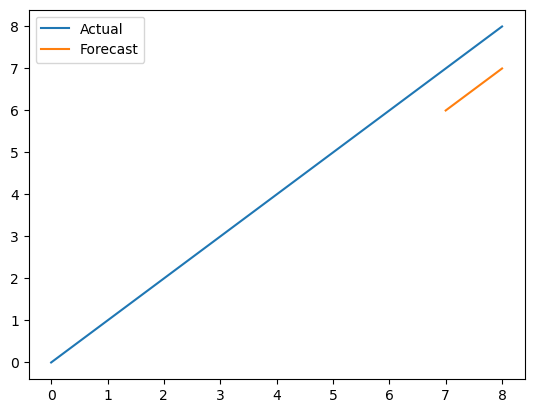

In [79]:
# get the forecast values for the "Jacket" product
jacket_forecast = products["Jacket"]["forecast"]

# plot the actual and forecast values
plt.plot(data, label="Actual")
plt.plot([train_size, train_size+1], [train_data[-1], jacket_forecast], label="Forecast")
plt.legend()
plt.show()


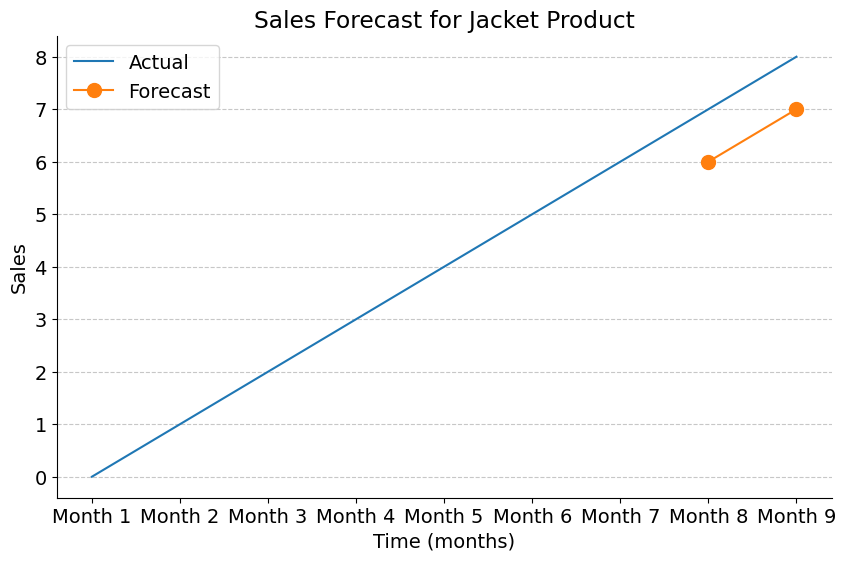

In [80]:
import matplotlib.pyplot as plt

# Get the forecast values for the "Jacket" product
jacket_forecast = products["Jacket"]["forecast"]

# Set the figure size and font size
plt.figure(figsize=(10, 6))
plt.rcParams.update({"font.size": 14})

# Plot the actual and forecast values
plt.plot(data, color="#1f77b4", label="Actual")
plt.plot([train_size, train_size+1], [train_data[-1], jacket_forecast], color="#ff7f0e", marker="o", markersize=10, label="Forecast")

# Add titles, labels, and legend
plt.title("Sales Forecast for Jacket Product")
plt.xlabel("Time (months)")
plt.ylabel("Sales")
plt.xticks([i for i in range(len(data))], [f"Month {i+1}" for i in range(len(data))])
plt.legend()

# Add a grid and remove spines
plt.grid(axis="y", linestyle="--", alpha=0.7)
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

# Show the plot
plt.show()


In [81]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# define the data and train_size
data = [0, 1, 2, 3, 4, 5, 6, 7, 8]
train_size = 7

# create a dictionary for each product
products = {
    "Jacket": {},
    "Shirt": {},
    "Trousers": {}
}

# set the train_data and test_data arrays as values in each product dictionary
for name in products.keys():
    train_data, test_data = data[:train_size], data[train_size:]
    products[name]["train_data"] = train_data
    products[name]["test_data"] = test_data

    # fit an ARIMA model to the training data and forecast the next 4 months' sales
    model = ARIMA(train_data, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=4)
    products[name]["forecast"] = forecast

    # print the forecast for the next 4 months
    print(f"{name} forecasted sales for the next 4 months: {forecast}")


C:\Users\valer\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\valer\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Jacket forecasted sales for the next 4 months: [6.99985566 7.9994639  8.9988248  9.99793842]
Shirt forecasted sales for the next 4 months: [6.99985566 7.9994639  8.9988248  9.99793842]
Trousers forecasted sales for the next 4 months: [6.99985566 7.9994639  8.9988248  9.99793842]


C:\Users\valer\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [83]:
# get the forecast values for each product
forecasts = {name: model.forecast(steps=4) for name, model in models.items()}

# plot the actual and forecast values for each product
fig, axs = plt.subplots(1, 3, figsize=(15,5))

for i, (name, data) in enumerate(products.items()):
    train_data, test_data = data["train"], data["test"]
    train_size = len(train_data)
    forecast = forecasts[name]
    axs[i].plot(train_data + test_data, label="Actual")
    axs[i].plot(range(train_size, train_size+4), forecast, label="Forecast")
    axs[i].set_title(name)
    axs[i].set_xlabel("Month")
    axs[i].set_ylabel("Sales")
    axs[i].legend()

plt.show()


NameError: name 'models' is not defined

C:\Users\valer\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Jacket forecasted sales for the next 4 months: [6.99985566 7.9994639  8.9988248  9.99793842]


C:\Users\valer\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Shirt forecasted sales for the next 4 months: [6.99985566 7.9994639  8.9988248  9.99793842]


C:\Users\valer\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trousers forecasted sales for the next 4 months: [6.99985566 7.9994639  8.9988248  9.99793842]


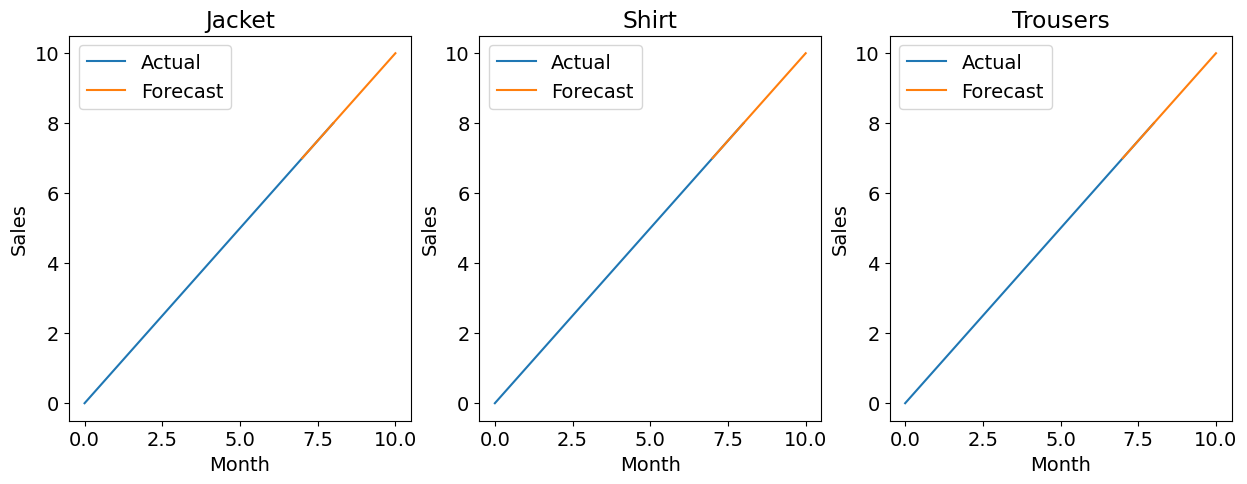

In [84]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# define the data and train_size
data = [0, 1, 2, 3, 4, 5, 6, 7, 8]
train_size = 7

# create a dictionary for each product
products = {
    "Jacket": {},
    "Shirt": {},
    "Trousers": {}
}

# set the train_data and test_data arrays as values in each product dictionary
for name in products.keys():
    train_data, test_data = data[:train_size], data[train_size:]
    products[name]["train"] = train_data
    products[name]["test"] = test_data

    # fit an ARIMA model to the training data and forecast the next 4 months' sales
    model = ARIMA(train_data, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=4)
    products[name]["forecast"] = forecast

    # print the forecast for the next 4 months
    print(f"{name} forecasted sales for the next 4 months: {forecast}")

# plot the actual and forecasted sales for each product
fig, axs = plt.subplots(1, 3, figsize=(15,5))

for i, (name, data) in enumerate(products.items()):
    train_data, test_data = data["train"], data["test"]
    forecast = data["forecast"]
    axs[i].plot(train_data + test_data, label="Actual")
    axs[i].plot(range(train_size, train_size+4), forecast, label="Forecast")
    axs[i].set_title(name)
    axs[i].set_xlabel("Month")
    axs[i].set_ylabel("Sales")
    axs[i].legend()

plt.show()
